## Description
Visualize the distribution of BA measurement values for the same peptide-allele combination for a given DB1. 
This is useful to get a glimpse at how problematic the labels are. Indeed, the same sample could have different labels because of different experimental setups. To tackle this issue, here we visualize the distribution of the values in 3 steps:
- Group data by allele and peptide (print the count)
- Compute the difference of BA values for each peptide-MHC combination
- Plot the distribution of the differences

In [29]:
import pandas as pd
df = pd.read_csv("../../data/external/processed/all_hla_pseudoseq.csv")
from plotly import express as px
import torch
from torch import tensor as t
from matplotlib import pyplot as plt

In [18]:
# print the number of peptides (with the same allele) having more than 1 measurement:
grp_obj = df.groupby(["allele", "peptide"], as_index=False).size()
reds = grp_obj.loc[grp_obj["size"] > 1] # reds = redundancies
print(f"Number of peptides (with same allele) having more than 1 measurement: {len(reds)}")

# gather measurement_values of those peptides to plot the distribution of their difference:
alleles = reds["allele"].tolist()
peptides = reds["peptide"].tolist()

BA_values = [df.loc[(df["allele"] == allele) & (df["peptide"] == peptide)]["measurement_value"].tolist() for allele,peptide in zip(alleles,peptides)]


Number of peptides (with same allele) having more than 1 measurement: 9143


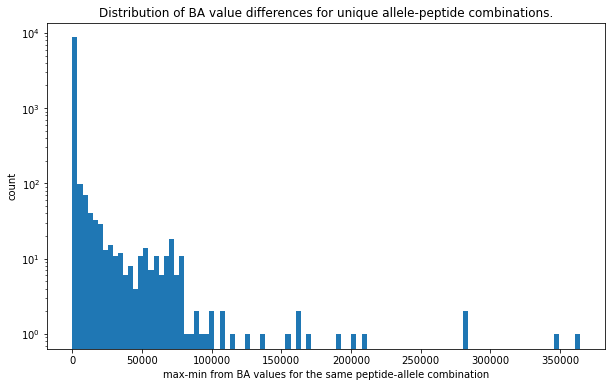

In [43]:
BA_diff = t([t(values).max() - t(values).min() for values in BA_values])
plt.figure(figsize=(10,6))
plt.title("Distribution of BA value differences for unique allele-peptide combinations.")
plt.hist(BA_diff, bins=100)
plt.ylabel("count")
plt.xlabel("max-min from BA values for the same peptide-allele combination")
plt.yscale("log")